In [1]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
import pandas as pd
import numpy as np

%matplotlib inline

In [2]:
df = pd.read_csv("Clean_Cyclistic_Data.csv", index_col=0)

C:\Users\kimba\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (6,8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.shape, df.dtypes

((4492727, 17),
 ride_id                object
 rideable_type          object
 started_at             object
 ended_at               object
 start_station_name     object
 start_station_id       object
 end_station_name       object
 end_station_id         object
 start_lat             float64
 start_lng             float64
 end_lat               float64
 end_lng               float64
 member_casual          object
 ride_length           float64
 day_of_week             int64
 start_hour             object
 season                 object
 dtype: object)

In [4]:
df["route"] = df.start_station_name + "^" + df.end_station_name

In [5]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week,start_hour,season,route
0,BD0A6FF6FFF9B921,electric_bike,2020-11-01 13:36:00,2020-11-01 13:45:40,Dearborn St & Erie St,110.0,St. Clair St & Erie St,211.0,41.894177,-87.629127,41.894434,-87.623379,casual,9.666667,6,13:00,autumn,Dearborn St & Erie St^St. Clair St & Erie St
1,96A7A7A4BDE4F82D,electric_bike,2020-11-01 10:03:26,2020-11-01 10:14:45,Franklin St & Illinois St,672.0,Noble St & Milwaukee Ave,29.0,41.890959,-87.635343,41.900675,-87.662480,casual,11.316667,6,10:00,autumn,Franklin St & Illinois St^Noble St & Milwaukee...
2,C61526D06582BDC5,electric_bike,2020-11-01 00:34:05,2020-11-01 01:03:06,Lake Shore Dr & Monroe St,76.0,Federal St & Polk St,41.0,41.880983,-87.616754,41.872054,-87.629550,casual,29.016667,6,00:00,autumn,Lake Shore Dr & Monroe St^Federal St & Polk St
3,E533E89C32080B9E,electric_bike,2020-11-01 00:45:16,2020-11-01 00:54:31,Leavitt St & Chicago Ave,659.0,Stave St & Armitage Ave,185.0,41.895499,-87.682013,41.917744,-87.691392,casual,9.250000,6,00:00,autumn,Leavitt St & Chicago Ave^Stave St & Armitage Ave
4,1C9F4EF18C168C60,electric_bike,2020-11-01 15:43:25,2020-11-01 16:16:52,Buckingham Fountain,2.0,Buckingham Fountain,2.0,41.876497,-87.620358,41.876448,-87.620338,casual,33.450000,6,15:00,autumn,Buckingham Fountain^Buckingham Fountain


In [6]:
df.groupby("member_casual").route.value_counts()

member_casual  route                                              
casual         Streeter Dr & Grand Ave^Streeter Dr & Grand Ave        11645
               Millennium Park^Millennium Park                         6221
               Michigan Ave & Oak St^Michigan Ave & Oak St             6003
               Lake Shore Dr & Monroe St^Lake Shore Dr & Monroe St     5184
               Buckingham Fountain^Buckingham Fountain                 3557
                                                                      ...  
member         Yates Blvd & 75th St^South Shore Dr & 71st St              1
               Yates Blvd & 75th St^Stony Island Ave & 75th St            1
               Yates Blvd & 93rd St^Clyde Ave & 87th St                   1
               Yates Blvd & 93rd St^Stewart Ave & 83rd St                 1
               Yates Blvd & 93rd St^Stony Island Ave & 64th St            1
Name: route, Length: 246051, dtype: int64

casual riders often start and end at same station (top 6 routes, 9 of top 10), this is rare for members (0 of top 10).  
the stations the two groups most frequent seem to be very different.  

In [7]:
a = df.groupby("member_casual").route.value_counts()
a.loc["casual"][:10], a.loc["member"][:10]

(route
 Streeter Dr & Grand Ave^Streeter Dr & Grand Ave          11645
 Millennium Park^Millennium Park                           6221
 Michigan Ave & Oak St^Michigan Ave & Oak St               6003
 Lake Shore Dr & Monroe St^Lake Shore Dr & Monroe St       5184
 Buckingham Fountain^Buckingham Fountain                   3557
 Theater on the Lake^Theater on the Lake                   3324
 Streeter Dr & Grand Ave^Millennium Park                   3181
 Montrose Harbor^Montrose Harbor                           3085
 Indiana Ave & Roosevelt Rd^Indiana Ave & Roosevelt Rd     3005
 Michigan Ave & 8th St^Michigan Ave & 8th St               2917
 Name: route, dtype: int64,
 route
 Ellis Ave & 60th St^Ellis Ave & 55th St         3498
 Ellis Ave & 55th St^Ellis Ave & 60th St         3098
 Ellis Ave & 60th St^University Ave & 57th St    2057
 University Ave & 57th St^Ellis Ave & 60th St    2014
 State St & 33rd St^Calumet Ave & 33rd St        1715
 Loomis St & Lexington St^Morgan St & Polk St   

docked bikes are used disproportionately more by casual riders. greatly outnumber members despite there being only 80% as many casual riders as members total.

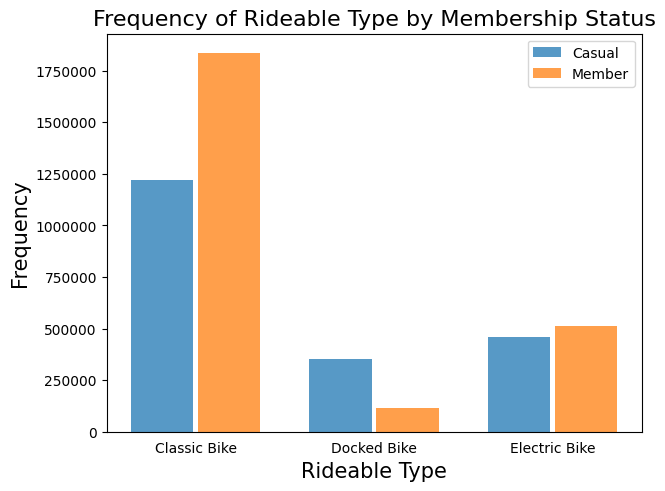

In [8]:
ct = pd.crosstab(df.member_casual, df.rideable_type)
labels = ct.columns
x = np.arange(len(labels))
width = 0.35


plt.style.use("default")
fig, ax = plt.subplots(constrained_layout=True)
_ = ax.bar(x - width/2 - 0.0125, ct.iloc[0, :], width, label=ct.iloc[0, :].name.capitalize(),
           alpha=0.75)
_ = ax.bar(x + width/2 + 0.0125, ct.iloc[1, :], width, label=ct.iloc[1, :].name.capitalize(),
           alpha=0.75)

_ = ax.set(xticks=[0, 1, 2],
           xticklabels=list(map(lambda x: " ".join(list(map(lambda y: y.capitalize(), x.split("_")))), ct.columns)))
_ = ax.tick_params(bottom=False)
_ = ax.ticklabel_format(style="plain", axis="y")

_ = ax.set_xlabel("Rideable Type", fontsize=15)
_ = ax.set_ylabel("Frequency", fontsize=15)
_ = ax.set_title("Frequency of Rideable Type by Membership Status", fontsize=16)

_ = ax.legend()

In [9]:
ct = pd.crosstab(df.member_casual, df.rideable_type)
print(f"{ct.iloc[0, :].name}: \n{ct.iloc[0, :]}\n\n{ct.iloc[1, :].name}: \n{ct.iloc[1, :]}")

casual: 
rideable_type
classic_bike     1221422
docked_bike       350489
electric_bike     458999
Name: casual, dtype: int64

member: 
rideable_type
classic_bike     1837067
docked_bike       113386
electric_bike     511364
Name: member, dtype: int64


In [10]:
list(map(lambda x: " ".join(list(map(lambda y: y.capitalize(), x.split("_")))), ct.columns))

['Classic Bike', 'Docked Bike', 'Electric Bike']

lets check rideable types by season

In [11]:
ct_mem = pd.crosstab(df[df.member_casual == "member"].rideable_type, df[df.member_casual == "member"].season)
ct_cas = pd.crosstab(df[df.member_casual == "casual"].rideable_type, df[df.member_casual == "casual"].season)

In [12]:
ct_mem

season,autumn,spring,summer,winter
rideable_type,,,,
classic_bike,322706,545787,805891,162683
docked_bike,113385,0,0,1
electric_bike,158886,134250,178945,39283


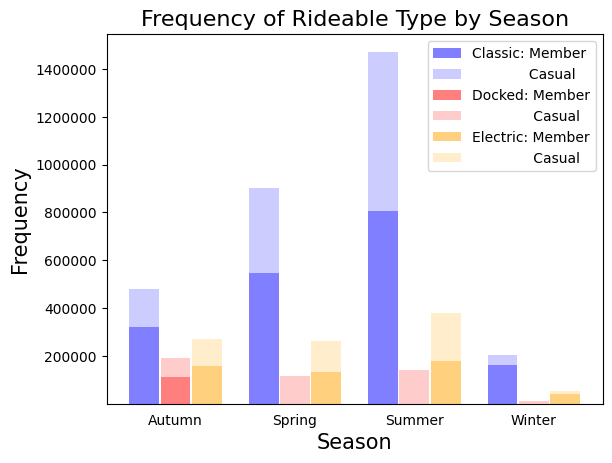

In [13]:
width = 0.25
gap = 0.0125
x = np.arange(len(ct_mem.columns))

fig, ax = plt.subplots()

# darker shade for members, colored by rideable type
# weird labels are for lining the rendered legend text up nicely
_ = ax.bar(x - (width + gap), ct_mem.iloc[0, :], width=width,
           alpha=0.5, color="blue",
           label="Classic: Member")
_ = ax.bar(x - (width + gap), ct_cas.iloc[0, :], width=width,
           color="blue", alpha=0.2,
           label="             Casual",
           bottom=ct_mem.iloc[0, :])

_ = ax.bar(x, ct_mem.iloc[1, :], width=width,
           color="red", alpha=0.5,
           label="Docked: Member")
_ = ax.bar(x, ct_cas.iloc[1, :], width=width,
           color="red", alpha=0.2,
           label="              Casual",
           bottom=ct_mem.iloc[1, :])

_ = ax.bar(x + (width + gap), ct_mem.iloc[2, :], width=width,
           color="orange", alpha=0.5,
           label="Electric: Member")
_ = ax.bar(x + (width + gap), ct_cas.iloc[2, :], width=width,
           color="orange", alpha=0.2,
           label="              Casual",
           bottom=ct_mem.iloc[2, :])

# placing ticks, setting tick labels to be seasons, removing tick marks
_ = ax.set(xticks=[0, 1, 2, 3],
           xticklabels=["Autumn", "Spring", "Summer", "Winter"])
_ = ax.tick_params(bottom=False)
_ = ax.ticklabel_format(style="plain", axis="y")

# titling axes
_ = ax.set_xlabel("Season", fontsize=15)
_ = ax.set_ylabel("Frequency", fontsize=15)
_ = ax.set_title("Frequency of Rideable Type by Season", fontsize=16)

_ = ax.legend()